## Лабораторная работа №6. Интерактивная визуализация. Визуализация в решении научных задач

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import plotly.express as px
import matplotlib.cm
from ChernoffFace import *
from sklearn.linear_model import LinearRegression 

## 1. ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ. ВИЗУАЛИЗАЦИЯ

In [25]:
df = pd.read_csv('Fish.csv')
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

Выведите описательную статистику для переменных датасета.

In [26]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [27]:
df.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

Используя  визуализацию,  покажите,  сколько различных  видов  рыб  включает  ваш  набор данных. 
Используйте интерактивную визуализацию.

In [28]:
px.pie(df, names='Species')

In [29]:
px.bar(df, x='Species', color='Species')

In [30]:
px.line(df, x='Species', color='Species')

Исследуйте,  есть  ли  какие-либо  зависимые переменные.

C:\Users\Home\AppData\Local\Temp\ipykernel_7968\3890422654.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



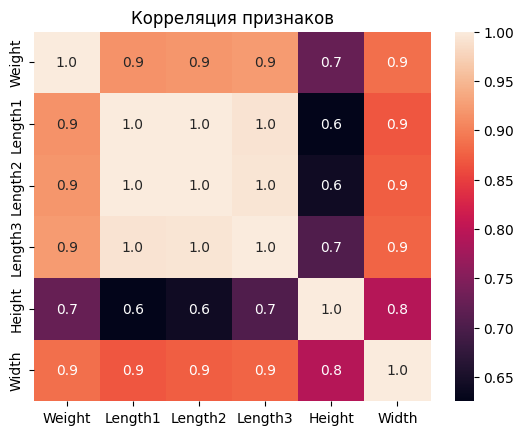

In [31]:
data = df.corr()

sns.heatmap(data,annot=True, fmt=".1f")
plt.title('Корреляция признаков')
plt.show()

Определите тип распределения количественных переменных

<AxesSubplot: xlabel='Height', ylabel='Count'>

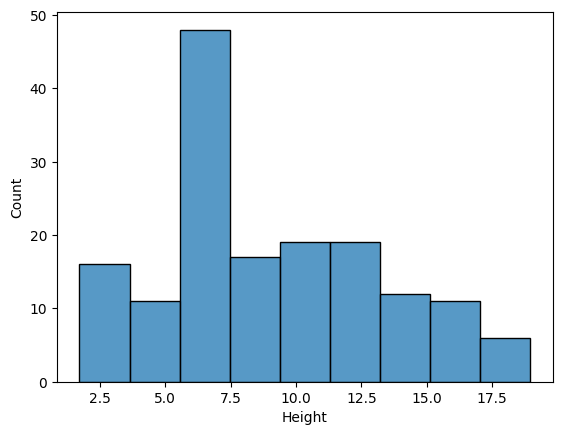

In [32]:
sns.histplot(df, x='Height')

<AxesSubplot: xlabel='Weight', ylabel='Count'>

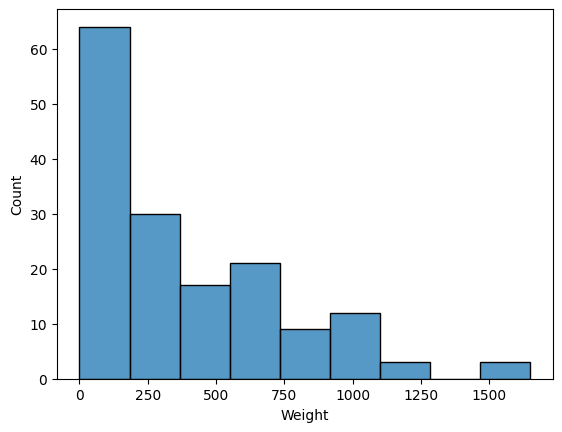

In [33]:
sns.histplot(df, x='Weight')

Существуют   ли   в   этом   наборе данных аномальные наблюдения?

<AxesSubplot: >

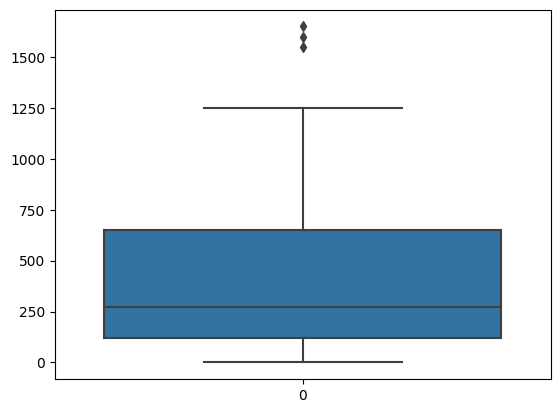

In [34]:
sns.boxplot(df['Weight'])

<AxesSubplot: >

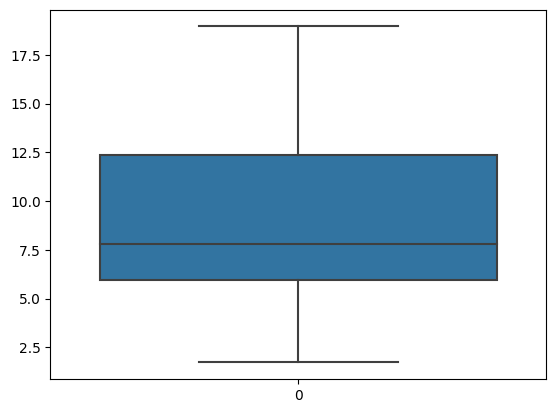

In [35]:
sns.boxplot(df['Height'])

Проверьте  данные  на  наличие  пропущенных значений

In [36]:
print(df.shape)
print(df.dropna().shape)

(159, 7)
(159, 7)


Используя    знания,    полученные    в    ходе выполнения предыдущей лабораторной Можно построить кривые Эндрюса,     графики     в 
работы, реализуйте визуализацию многомерных данных.

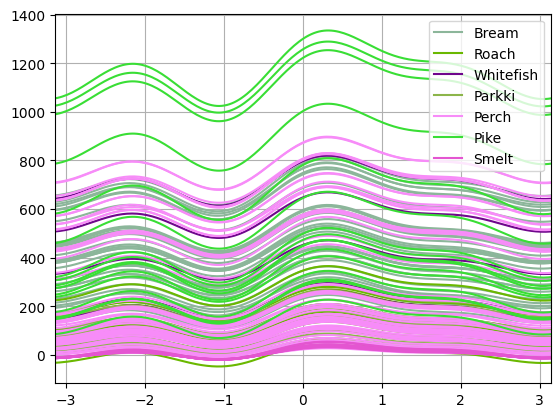

In [37]:
pd.plotting.andrews_curves(df, 'Species')
plt.show()

In [38]:
fig = chernoff_face(data=df, 
                    color_mapper=matplotlib.cm.Pastel1,
                    figsize=(40, 35), dpi=200)

fig.tight_layout()
plt.show()

## 2. РЕГРЕССИОННЫЙ АНАЛИЗ

Пусть  переменная  Weight  (y) –независимая (целевая)  переменная.  А  одна  из  других –зависимая  (x).  Постройте  модель  линейной регрессии.

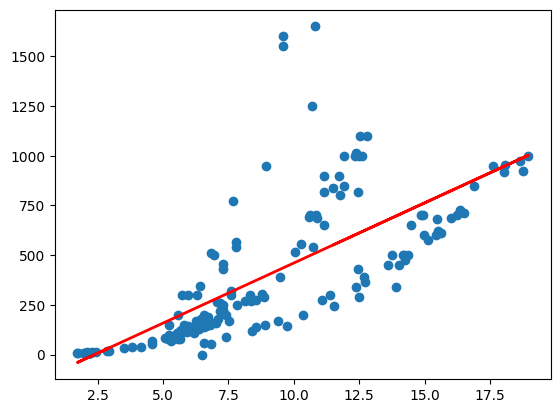

In [39]:
from sklearn.linear_model import LinearRegression 
y = np.array(df['Weight'])
x = np.array(df['Height'])

model = LinearRegression()
model.fit(x.reshape((-1,1)), y)
y_pred = model.predict(x.reshape((-1,1)))

plt.scatter(x=x,y=y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

Пусть  переменная  Weight  (y) –независимая (целевая)   переменная.   А   все   другие –зависимые  (xi).  Постройте  модель  линейной регрессии.    Постройте    график    рассеяния (scatterplot)   остатков   (residuals),   проверьте распределение   остатков   на   нормальность.

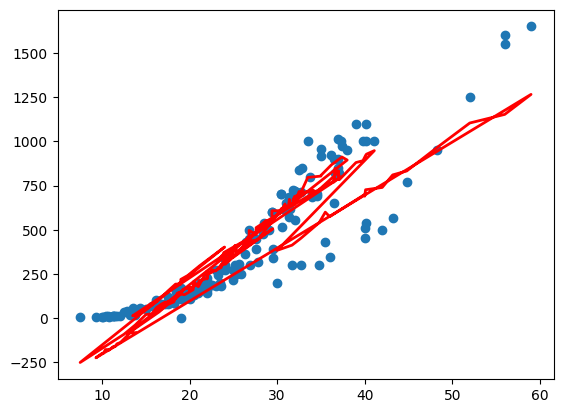

In [40]:
y = np.array(df['Weight'])
x = np.array(df[['Length1', 'Length2', 'Length3', 'Height', 'Width']])

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x[:,0],y=y)
plt.plot(x[:,0], y_pred, color='red', linewidth=2);
plt.show()

Найдите  выбросы,  наблюдения  с  высокой степенью напряженности, влиятельные наблюдения  для  модели,построенной  в  п.9. Визуализируйте результаты.

<AxesSubplot: >

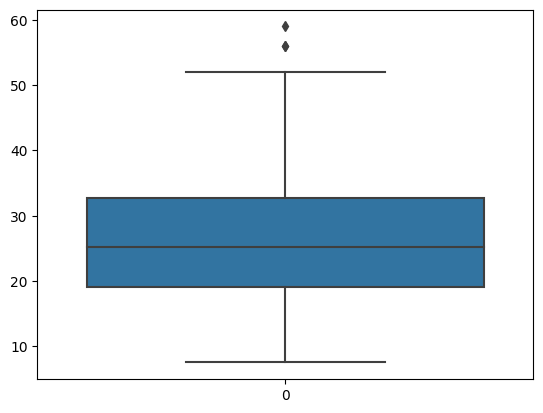

In [41]:
sns.boxplot(x[:,0])

<AxesSubplot: >

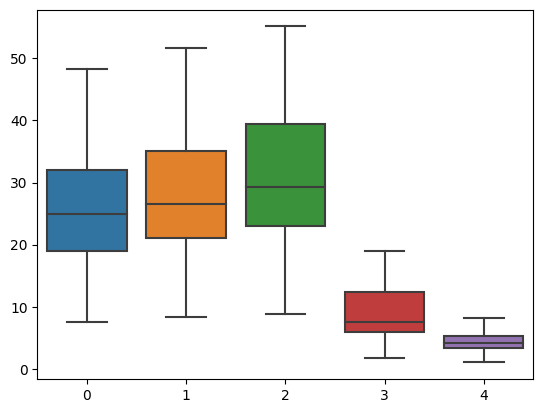

In [44]:
df = df[df.Length1 < 50]
data = x[x[:,0] < 50]
sns.boxplot(data)